In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame = True)
df = data.frame

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [7]:
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)# 20% of data is used for test and rest for traning

In [8]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [9]:
!python -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [10]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

model = XGBRegressor()
grid_params = {# a dictionary of parameters
    'n_estimator':[100, 200],
    'learning_rate':[0.1, 0.05],
    'max_depth':[3, 6]
    
}
grid = GridSearchCV(
    estimator=model,#GridSearchCV will clone this model and try it with different combinations
    param_grid=grid_params,
    cv=5,#This means 5-fold cross-validation.
    scoring='neg_mean_squared_error',
    verbose=1#it prints how the process going to keep track on while working on big dataset
)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_ # this is a build in function which help model to train on new params
y_pred = best_model.predict(X_test)

# Compare results
result = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print("The best combination for paramter is :", grid.best_params_)
print(result)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\ADCI\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:23:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ADCI\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:23:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ADCI\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:23:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ADCI\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:23:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: {

The best combination for paramter is : {'learning_rate': 0.1, 'max_depth': 6, 'n_estimator': 100}
       Actual  Predicted
11437   3.433   4.010586
12582   0.721   0.974089
3899    1.937   2.143663
13310   1.440   1.444651
9434    0.713   0.807807
...       ...        ...
10690   0.803   1.285447
12151   1.364   1.791909
15244   3.935   3.755482
10789   2.364   2.905476
10702   0.743   0.620454

[4128 rows x 2 columns]


In [11]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score
MAE = ("MAE:", mean_absolute_error(y_test, y_pred))
MSE = ("MSE:", mean_squared_error(y_test, y_pred))
r2 = ("R2 score:", r2_score(y_test, y_pred))
print(MAE)
print(MSE)
print(r2)

('MAE:', 0.3152744145862954)
('MSE:', 0.2243355656501517)
('R2 score:', 0.8354377890867183)


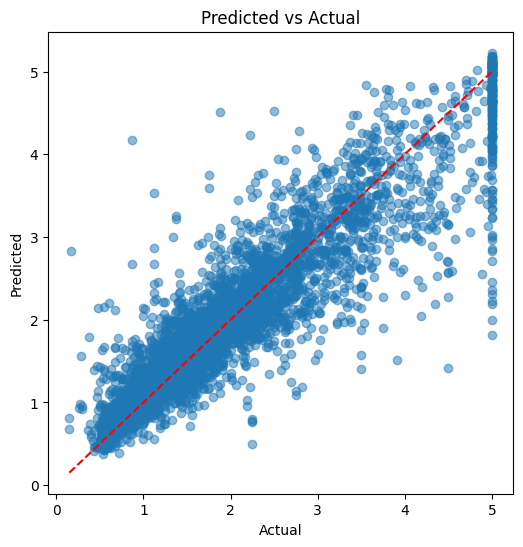

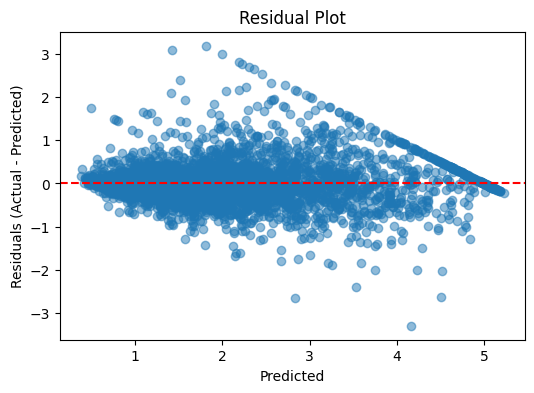

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Example: replace with your actual arrays
# y_test = actual values
# y_pred = predicted values

# 1. Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()

# 2. Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()
